# SIT 720 Assignment 2
Bryon Baker

Student number: 85031775

# Install required libraries

In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the SCADI Dataset

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass2/SCADI.csv'
full_df = pd.read_csv(url)
print(f"{full_df.head()}\n")

   Gender  Age  d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  \
0       0   18         0         0         0         0         1         0   
1       0   22         0         0         0         0         1         0   
2       0   18         0         0         0         1         0         0   
3       1   18         0         0         0         0         1         0   
4       0   19         0         0         0         0         1         0   

   d 5100-9  d 5101-0  ...  d 57022-8  d 57022-9  d 571-0  d 571-1  d 571-2  \
0         0         0  ...          0          0        0        0        0   
1         0         0  ...          0          0        0        0        0   
2         0         0  ...          0          0        0        0        0   
3         0         0  ...          0          0        0        0        1   
4         0         0  ...          0          0        0        0        1   

   d 571-3  d 571-4  d 571-8  d 571-9  Classes  
0      

In [4]:
# Display stats on the data frame
shape = full_df.shape
print(f"Initial shape: {shape}")

Initial shape: (70, 206)


# Question 1
1. Determine the number of subgroups (clusters) from the dataset using attributes 3-255.
2. Is this the same as the number of classes presented by attribute 206 (Classes)? 
3. Explain and justify your findings.

In [5]:
# Drop attributes: 1, 2, and 205
df = full_df.drop(["Gender","Age","Classes"], axis=1)
shape = df.shape
print(f"New shape: {shape}")
print(f"{df.head()}")

New shape: (70, 203)
   d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  d 5100-9  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         1         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   d 5101-0  d 5101-1  d 5101-2  ...  d 57022-4  d 57022-8  d 57022-9  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   d 571-0  d 571-1  d 571-2  d 571-3  d 571-4  d 571-8  d 571-9  
0        0        0   

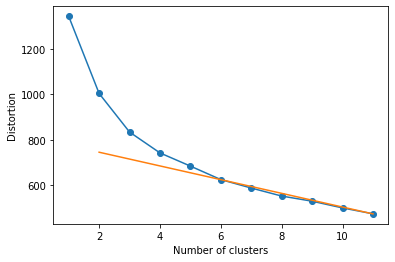

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_classes = 6         # Number of classes in the original dataset
distortions = []
ref_xLine = [2,11]
ref_yLine = [625, 475]

min_k = 1
max_k = 12
for n in range(min_k,max_k):
    km = KMeans( n_clusters=n, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0 )
    y_km = km.fit(df)
    distortions.append(km.inertia_)
    
# plot
plt.plot(range(min_k, max_k), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# Plot a reference line to highlight where the elbow is located. y = mx+c
x1 = num_classes
x2 = max_k-1
y1 = distortions[num_classes-1]
y2 = distortions[max_k-2]
m =  (y2 - y1) / (x2 - x1)
c = y1 - (m * x1)
ref_y1 = (m * 2) + c    # Calc the left of the reference line
ref_yLine[0] = ref_y1
plt.plot(ref_xLine, ref_yLine, label = "line 1")
plt.show()